In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from IPython import display
import seaborn as sns
import pandas as pd
import numpy as np

# Load Dataset

In [20]:
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [21]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Extracting Features and Labels

In [22]:
X = iris.iloc[:,:-1].values

In [24]:
X.shape

(150, 4)

In [ ]:
y = np.zeros(len(X), dtype = 'int32')
y[iris.species == 'setosa'] = 0
y[iris.species == 'versicolor'] = 1
y[iris.species == 'virginica'] = 2

In [ ]:
X.shape

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

# Creating Neural Network

In [26]:
model = Sequential()
model.add(Dense(units = 32, input_shape =(4, ), activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01) ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training The Model

In [29]:
hist = model.fit(X, y, epochs = 1500)

Epoch 1/1500
5/5 [==============================] - 1s 5ms/step - loss: 1.3629 - accuracy: 0.5867
Epoch 2/1500
5/5 [==============================] - 0s 3ms/step - loss: 0.9173 - accuracy: 0.6667
Epoch 3/1500
5/5 [==============================] - 0s 5ms/step - loss: 0.8145 - accuracy: 0.6667
Epoch 4/1500
5/5 [==============================] - 0s 3ms/step - loss: 0.7602 - accuracy: 0.6667
Epoch 5/1500
5/5 [==============================] - 0s 3ms/step - loss: 0.7241 - accuracy: 0.7000
Epoch 6/1500
5/5 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.7733
Epoch 7/1500
5/5 [==============================] - 0s 3ms/step - loss: 0.6636 - accuracy: 0.8067
Epoch 8/1500
5/5 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.8533
Epoch 9/1500
5/5 [==============================] - 0s 5ms/step - loss: 0.6178 - accuracy: 0.8667
Epoch 10/1500
5/5 [==============================] - 0s 5ms/step - loss: 0.6062 - accuracy: 0.8533
Epoch 11/1500
5/5 [

# Visualizing Loss Vs Epochs

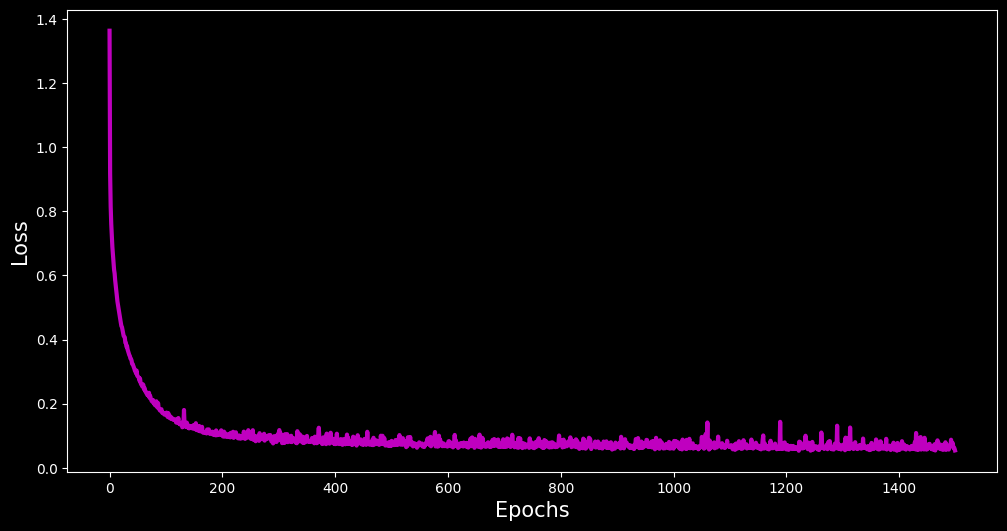

In [30]:
plt.figure(figsize =(12,6))
plt.plot(hist.history['loss'],'m', lw = 3, label= 'Training Loss')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

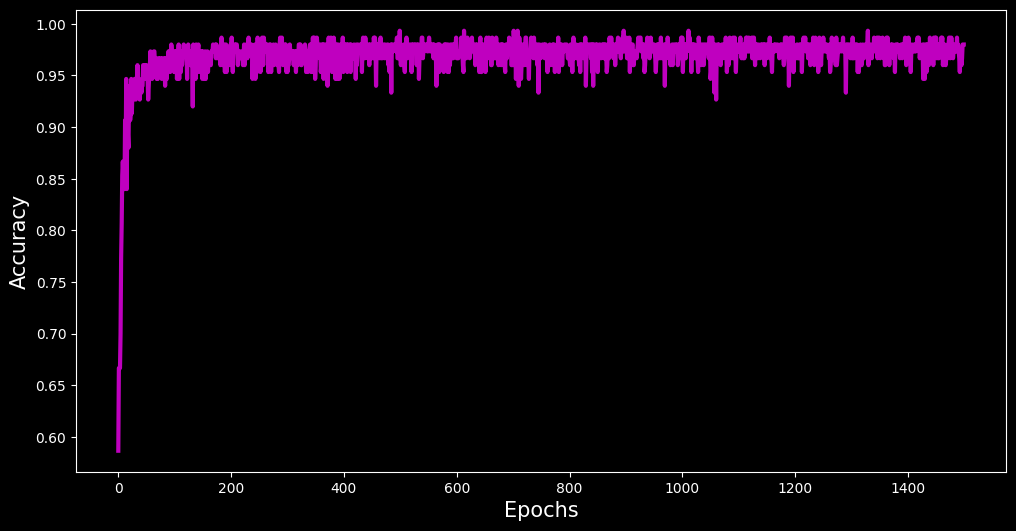

In [31]:
plt.figure(figsize =(12,6))
plt.plot(hist.history['accuracy'],'m', lw = 3, label= 'Training Accuracy')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Accuracy', fontsize = 15)
plt.show()

In [32]:
print("% Accuracy : ", np.round(hist.history['accuracy'][-1] * 100))

% Accuracy :  98.0
